In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [6]:
from readSu import read_su_trace

In [20]:
vp = np.fromfile(r'E:\tools\写论文\图表数据\还原地层\model_1025.vp',dtype=np.float32)

In [21]:
vp = vp.reshape((512,512))

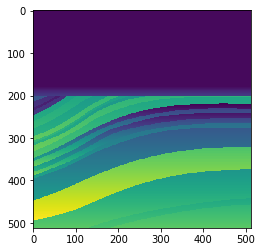

In [22]:
plt.imshow(vp)

In [97]:
# 数据放大最终在0-1之间 实际值需要调整
amp = 2.4e5
# 数据截取，开头的直达波部分的削弱，实际值需要调整
epison = 4e-06
# 得到10240*33的数据
traces_ = read_su_trace(r'\\10.1.4.151\share\zzm\data\experiment5\su_256\su_y_5.su.shot1')
# 道数据直达波和反射波大小调整 过大的部分直接截取
traces = traces_.clip(-epison, epison)
# 数据放大到 -1 到 1 之间
traces = amp * traces

In [22]:
traces.shape

(33, 10240)

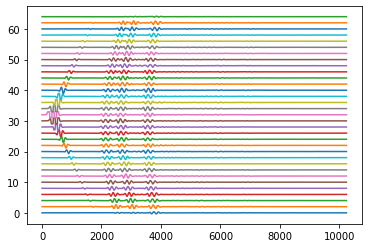

In [98]:
index = [i for i in range(10240)]
for t_num in range(33):
    plt.plot(index,traces[t_num]+t_num*2)
plt.show()

In [93]:
np.min(traces)

-0.95999998

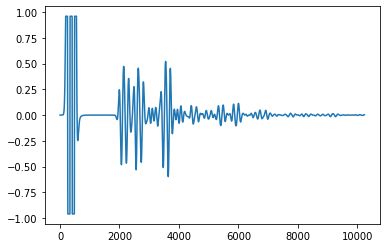

In [99]:
plt.plot([i for i in range(10240)],traces[16])

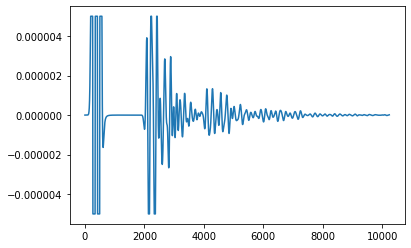

In [95]:
traces_2 = traces_.clip(-5e-6, 5e-6)
plt.plot([i for i in range(10240)],traces_2[16])

In [ ]:
traces = traces_.clip(-epison, 0.00001)

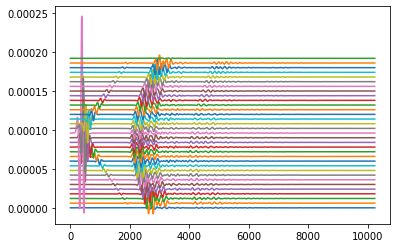

In [92]:
index = [i for i in range(10240)]
for t_num in range(33):
    plt.plot(index,traces_[t_num]+t_num*6e-6)
plt.show()

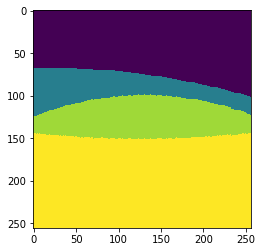

In [71]:
vp = np.fromfile(r'\\10.1.4.151\share\zzm\data\experiment5\model_256\m_3.vp',dtype=np.float32)
vp = vp.reshape((256,256))
plt.imshow(vp.T)

In [5]:
num = 0
vp_labels = np.zeros((10240,256,256),dtype=np.int32)
while num<10240:
    if num%1000 == 0:
        print(num," start")
    x = np.random.randint(64,192,size=(3))
    y = np.random.randint(16,128,size=(3))
    x[0]=0
    x[2]=256
    z1 = np.polyfit(x,y,2)
    p1 = np.poly1d(z1)
    depths1 = np.round(p1([i for i in range(256)])).astype(np.int32)
    x = np.random.randint(64,192,size=(3))
    y = np.random.randint(0,64,size=(3))
    x[0]=0
    x[2]=256
    z1 = np.polyfit(x,y,2)
    p1 = np.poly1d(z1)
    depths2 = np.round(p1([i for i in range(256)])).astype(np.int32)
    x = np.random.randint(64,192,size=(3))
    y = np.random.randint(0,64,size=(3))
    x[0]=0
    x[2]=256
    z1 = np.polyfit(x,y,2)
    p1 = np.poly1d(z1)
    depths3 = np.round(p1([i for i in range(256)])).astype(np.int32)
    depths2_ = depths2+depths1+16
    depths3_ = depths3 + depths2_+16
    speed_list = [1500,1725,2000,2250,2500,2750,3000,3250]
    speed_index = random.sample(range(0, 8), 4)
    speed_index.sort()
    if np.max(depths3_) > 256 or np.min(depths1)<0:
        print('no')
    else:
        vpdata = np.zeros((256,256),dtype=np.float32)
        vp_label = np.zeros((256,256),dtype=np.int32)
        for index in range(256):
            vpdata[0:depths1[index],index] = speed_list[speed_index[0]]
            vpdata[depths1[index]:depths2_[index],index] = speed_list[speed_index[1]]
            vpdata[depths2_[index]:depths3_[index],index] = speed_list[speed_index[2]]
            vpdata[depths3_[index]:,index] = speed_list[speed_index[3]]
            vp_label[0:depths1[index],index] = speed_index[0]
            vp_label[depths1[index]:depths2_[index],index] = speed_index[1]
            vp_label[depths2_[index]:depths3_[index],index] = speed_index[2]
            vp_label[depths3_[index]:,index] = speed_index[3]
        vsdata = vpdata/np.sqrt(3)
        rhodata = 0.31*vpdata**(1/4)*1000
        vpdata.T.tofile(r'\\10.1.4.151\share\zzm\data\experiment5\model_256\m_'+str(num)+ '.vp')
        vsdata.T.tofile(r'\\10.1.4.151\share\zzm\data\experiment5\model_256\m_'+str(num)+ '.vs')
        rhodata.T.tofile(r'\\10.1.4.151\share\zzm\data\experiment5\model_256\m_'+str(num)+ '.rho')
        vp_labels[num] = vp_label
        num +=1
    #     plt.imshow(rhodata)
np.save(r'D:\dataaaaaaaaa\vp_labels',vp_labels)

0  start
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
1000  start
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
2000  start
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
3000  start
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
4000  start
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
5000  start
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
n

(256, 256)

In [150]:
speed = random.sample(range(0, 8), 4)
speed.sort()
print(speed)

[0, 3, 4, 5]
